# Gini Index

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

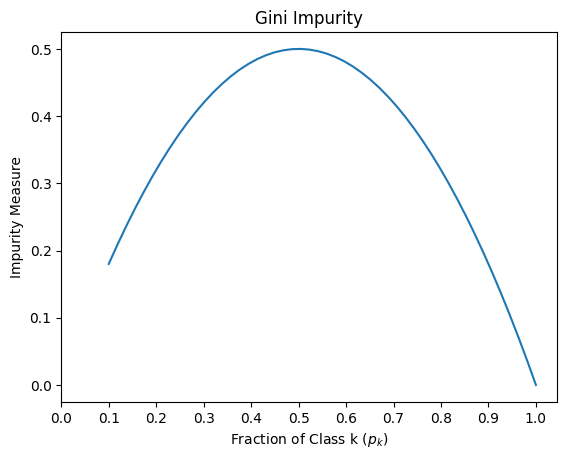

In [2]:
#Plot Gini ımpurity measures 
plt.figure()
x = np.linspace(0.1,1)
y = 1 - (x*x) - (1-x)*(1-x) 
plt.plot(x,y)
plt.title('Gini Impurity')
plt.xlabel("Fraction of Class k ($p_k$)")
plt.ylabel("Impurity Measure")
plt.xticks(np.arange(0,1.1,0.1))

plt.show()

In [3]:
# Defining a simple dataset
attribute_names =  ['age', 'income','student', 'credit_rate']
class_name = 'default'

sample ={
    'age' : ['youth', 'youth', 'middle_age', 'senior', 'senior', 'senior','middle_age', 'youth', 'youth', 'senior', 'youth', 'middle_age','middle_age', 'senior'],
    'income' : ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium','low', 'medium', 'medium', 'medium', 'high', 'medium'],
    'student' : ['no','no','no','no','yes','yes','yes','no','yes','yes','yes','no','yes','no'],
    'credit_rate' : ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair','excellent', 'excellent', 'fair', 'excellent'],
    'default' : ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes','yes', 'yes', 'yes', 'no']
}
df = pd.DataFrame (sample, columns=sample.keys())

In [4]:
df

,age,income,student,credit_rate,default
0,youth,high,no,fair,no
1,youth,high,no,excellent,no
2,middle_age,high,no,fair,yes
3,senior,medium,no,fair,yes
4,senior,low,yes,fair,yes
5,senior,low,yes,excellent,no
6,middle_age,low,yes,excellent,yes
7,youth,medium,no,fair,no
8,youth,low,yes,fair,yes
9,senior,medium,yes,fair,yes


## Paso 1: Calculate Gini(D)

In [5]:
def gini_impurity (value_counts):
    n = value_counts.sum()
    p_sum = 0
    for key in value_counts.keys():
        p_sum = p_sum  +  (value_counts[key] / n ) * (value_counts[key] / n ) 
    gini = 1 - p_sum
    return gini

class_value_counts = df[class_name].value_counts()
print(f'Number of samples in each class is:\n{class_value_counts}')

gini_class = gini_impurity(class_value_counts)
print(f'\nGini Impurity of the class is {gini_class:.3f}')

Number of samples in each class is:
default
yes    9
no     5
Name: count, dtype: int64

Gini Impurity of the class is 0.459


## Paso 2: Calculating  gini impurity for the attiributes

In [6]:
def gini_split_a(attribute_name):
    attribute_values = df[attribute_name].value_counts()
    gini_A = 0 
    for key in attribute_values.keys():
        df_k = df[class_name][df[attribute_name] == key].value_counts()
        n_k = attribute_values[key]
        n = df.shape[0]
        gini_A = gini_A + (( n_k / n) * gini_impurity(df_k))
    return gini_A

gini_attiribute ={}
for key in attribute_names:
    gini_attiribute[key] = gini_split_a(key)
    print(f'Gini for {key} is {gini_attiribute[key]:.3f}')

Gini for age is 0.343
Gini for income is 0.440
Gini for student is 0.367
Gini for credit_rate is 0.429


## Paso 3:  Compute Gini gain values to find the best split

* An attribute has maximum Gini gain is selected for splitting.

In [7]:
min_value = min(gini_attiribute.values())
print('Minimum value of Gini Impurity : {0:.3} '.format(min_value))
print('Maximum value of Gini Gain     : {0:.3} '.format(1-min_value))

selected_attribute = min(gini_attiribute.keys())
print('The selected attiribute is: ', selected_attribute)

Minimum value of Gini Impurity : 0.343 
Maximum value of Gini Gain     : 0.657 
The selected attiribute is:  age
